In [1]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)

In [156]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [79]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)
all_features = features.get_total_transactions(all_features, transaction_categories)

In [80]:
all_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)

In [9]:
all_features.to_csv('../../data_q2/features.csv', index = False)

In [143]:
all_features = pd.read_csv("../../data_q2/features.csv")
na_consumers = consumer[consumer["DQ_TARGET"].isna()]["prism_consumer_id"].astype(int)
all_features = all_features[~all_features["prism_consumer_id"].isin(na_consumers)]
all_features = all_features.set_index('prism_consumer_id')
all_features = all_features[all_features['transactions'] > 1]


Logistic Regression Results
ROC-AUC: 0.761 | Accuracy: 0.777
Training Time: 1.0s | Predicting Time: 0.000004s
              precision    recall  f1-score   support

         0.0       0.95      0.79      0.87      1818
         1.0       0.23      0.61      0.33       185

    accuracy                           0.78      2003
   macro avg       0.59      0.70      0.60      2003
weighted avg       0.89      0.78      0.82      2003



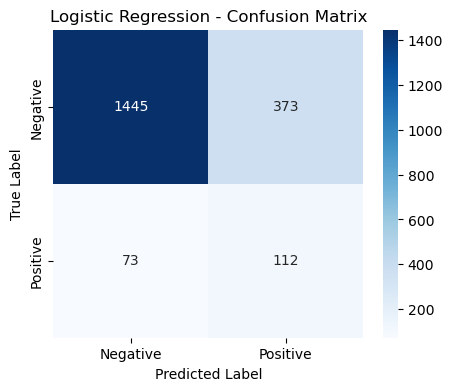


Random Forest Results
ROC-AUC: 0.804 | Accuracy: 0.904
Training Time: 13.9s | Predicting Time: 0.000033s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.44      0.13      0.20       185

    accuracy                           0.90      2003
   macro avg       0.68      0.56      0.57      2003
weighted avg       0.87      0.90      0.88      2003



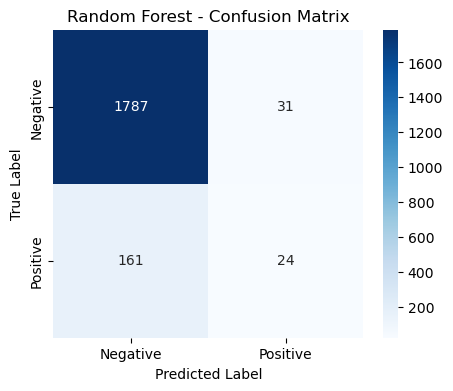


LightGBM Results
ROC-AUC: 0.820 | Accuracy: 0.907
Training Time: 4.3s | Predicting Time: 0.000030s
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.49      0.13      0.21       185

    accuracy                           0.91      2003
   macro avg       0.70      0.56      0.58      2003
weighted avg       0.88      0.91      0.88      2003



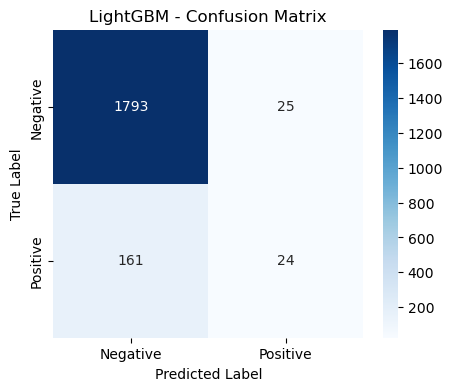


Balanced RF Results
ROC-AUC: 0.808 | Accuracy: 0.905
Training Time: 19.3s | Predicting Time: 0.000042s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.46      0.17      0.25       185

    accuracy                           0.90      2003
   macro avg       0.69      0.58      0.60      2003
weighted avg       0.88      0.90      0.88      2003



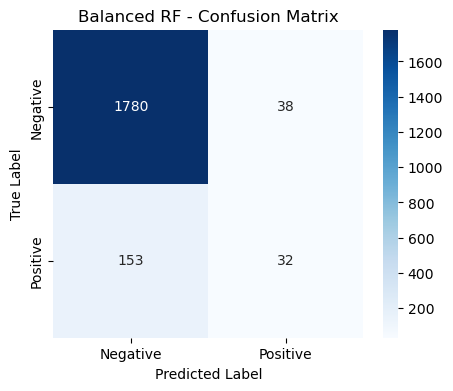


XGBoost Results
ROC-AUC: 0.810 | Accuracy: 0.903
Training Time: 5.1s | Predicting Time: 0.000014s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.42      0.15      0.22       185

    accuracy                           0.90      2003
   macro avg       0.67      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003



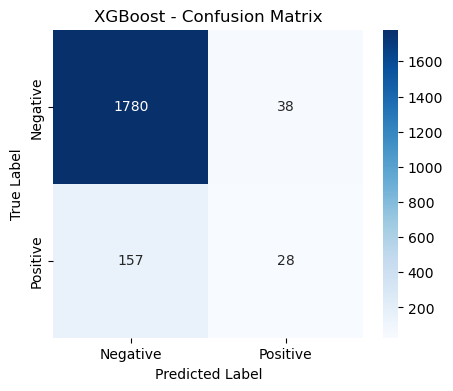


CatBoost Results
ROC-AUC: 0.815 | Accuracy: 0.899
Training Time: 7.1s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1818
         1.0       0.40      0.19      0.26       185

    accuracy                           0.90      2003
   macro avg       0.66      0.58      0.60      2003
weighted avg       0.87      0.90      0.88      2003



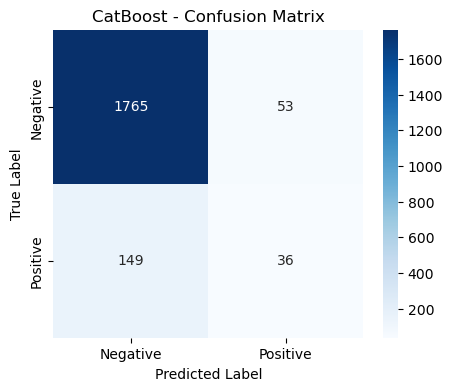


HistGB Results
ROC-AUC: 0.799 | Accuracy: 0.904
Training Time: 10.0s | Predicting Time: 0.000047s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.44      0.15      0.22       185

    accuracy                           0.90      2003
   macro avg       0.68      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003



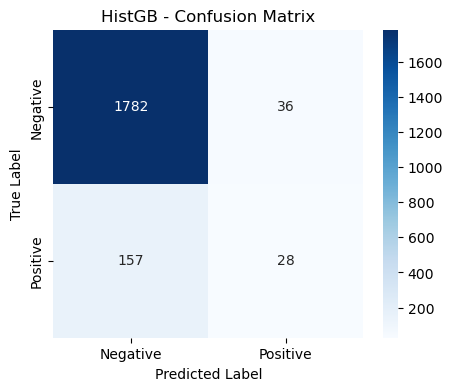


RUSBoost Results
ROC-AUC: 0.803 | Accuracy: 0.737
Training Time: 64.8s | Predicting Time: 0.000097s
              precision    recall  f1-score   support

         0.0       0.96      0.74      0.84      1818
         1.0       0.22      0.70      0.33       185

    accuracy                           0.74      2003
   macro avg       0.59      0.72      0.58      2003
weighted avg       0.89      0.74      0.79      2003



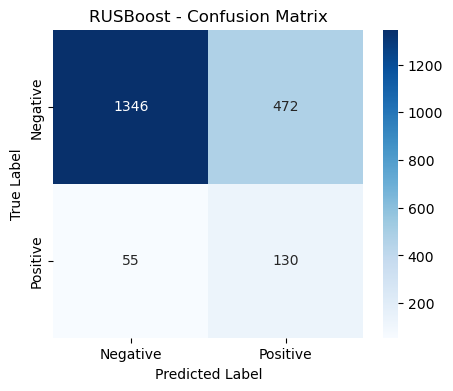


Ensemble Model Results
ROC-AUC: 0.800 | Accuracy: 0.679
Precision: 0.894 | Recall: 0.679 | F1-score: 0.746
              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79      1818
         1.0       0.19      0.77      0.31       185

    accuracy                           0.68      2003
   macro avg       0.58      0.72      0.55      2003
weighted avg       0.89      0.68      0.75      2003


======================================== FINAL RESULTS ========================================
              model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
           LightGBM 0.819511  0.907139   0.878092 0.907139  0.881828    4.276342      0.000030
           CatBoost 0.815184  0.899151   0.874341 0.899151  0.882781    7.091364      0.000009
            XGBoost 0.809794  0.902646   0.873255 0.902646  0.881111    5.058502      0.000014
        Balanced RF 0.808301  0.904643   0.878020 0.904643  0.884603   19.349581      0.

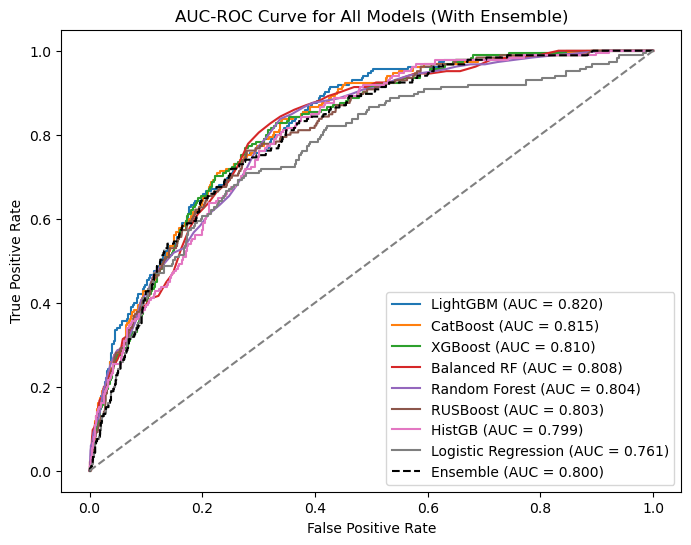

In [ ]:
classification_features = (
    all_features.drop(columns=["evaluation_date", "DQ_TARGET"])
).columns
classify.run_classification(classification_features, "DQ_TARGET", all_features)


LightGBM Results
ROC-AUC: 0.820 | Accuracy: 0.907
Training Time: 5.5s | Predicting Time: 0.000031s
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.49      0.13      0.21       185

    accuracy                           0.91      2003
   macro avg       0.70      0.56      0.58      2003
weighted avg       0.88      0.91      0.88      2003



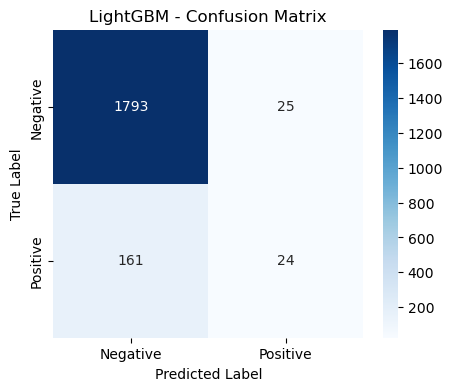


Balanced RF Results
ROC-AUC: 0.807 | Accuracy: 0.907
Training Time: 39.2s | Predicting Time: 0.000065s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.49      0.16      0.24       185

    accuracy                           0.91      2003
   macro avg       0.71      0.57      0.59      2003
weighted avg       0.88      0.91      0.88      2003



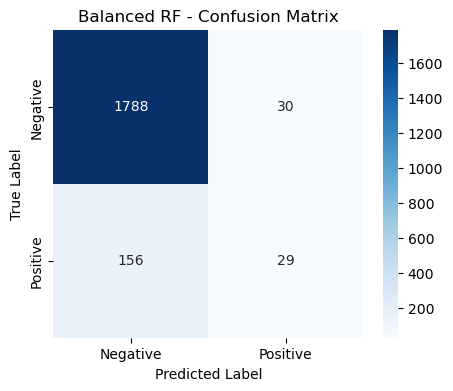


XGBoost Results
ROC-AUC: 0.810 | Accuracy: 0.903
Training Time: 4.7s | Predicting Time: 0.000008s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.42      0.15      0.22       185

    accuracy                           0.90      2003
   macro avg       0.67      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003



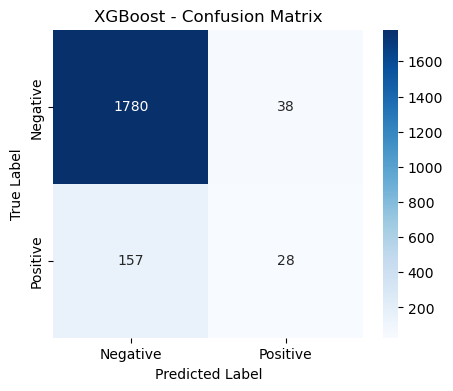


CatBoost Results
ROC-AUC: 0.815 | Accuracy: 0.899
Training Time: 7.8s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1818
         1.0       0.40      0.19      0.26       185

    accuracy                           0.90      2003
   macro avg       0.66      0.58      0.60      2003
weighted avg       0.87      0.90      0.88      2003



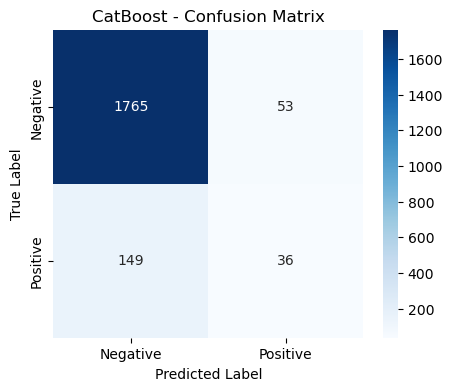


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.826 | Accuracy: 0.909
Precision: 0.882 | Recall: 0.909 | F1-score: 0.885
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.52      0.15      0.23       185

    accuracy                           0.91      2003
   macro avg       0.72      0.57      0.59      2003
weighted avg       0.88      0.91      0.89      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.825912  0.908637   0.882416 0.908637  0.885187         NaN           NaN
         LightGBM 0.819511  0.907139   0.878092 0.907139  0.881828    5.522279      0.000031
         CatBoost 0.815184  0.899151   0.874341 0.899151  0.882781    7.821693      0.000009
          XGBoost 0.809794  0.902646   0.8732

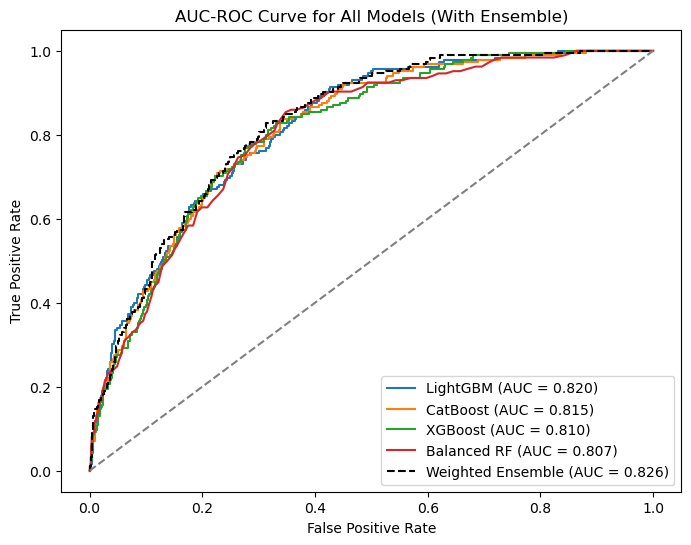

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 4  Weighted Ensemble  0.825912  0.908637         NaN           NaN   0.882416   
 0           LightGBM  0.819511  0.907139    5.522279      0.000031   0.878092   
 3           CatBoost  0.815184  0.899151    7.821693      0.000009   0.874341   
 2            XGBoost  0.809794  0.902646    4.736510      0.000008   0.873255   
 1        Balanced RF  0.807366  0.907139   39.196540      0.000065   0.880201   
 
      recall  f1-score  support  
 4  0.908637  0.885187      NaN  
 0  0.907139  0.881828   2003.0  
 3  0.899151  0.882781   2003.0  
 2  0.902646  0.881111   2003.0  
 1  0.907139  0.884718   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'Balanced RF': BalancedRandomForestClassifier(n_estimators=200, random_state=42),
  'XGBoost': XGBClassifier(base_score=None

In [153]:
classification_features = (all_features.drop(columns = ['evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification2(classification_features, "DQ_TARGET", all_features)

In [167]:
info = classify.individual_test(classification_features, "LightGBM", all_features, random_state=42)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ATM_CASH_mean
- ATM_CASH_skewness
- AUTOMOTIVE_coef_variation
- AUTOMOTIVE_count
- AUTOMOTIVE_iqr
- ...


In [11]:
info

,probability,top_1_feature,top_1_score,top_2_feature,top_2_score,top_3_feature,top_3_score,messages
prism_consumer_id,,,,,,,,
0,16,balance,0.450396,ACCOUNT_FEES_count,0.297846,BANKING_CATCH_ALL_coef_variation,0.189283,Increase BANKING_CATCH_ALL_coef_variation Decr...
1,7,ACCOUNT_FEES_count,0.231281,ESSENTIAL_SERVICES_count,0.170816,LOAN_count,0.138332,Decrease LOAN_count Increase ESSENTIAL_SERVICE...
2,11,ACCOUNT_FEES_count,0.281453,LOAN_count,0.126582,ESSENTIAL_SERVICES_mean,0.095939,Increase ESSENTIAL_SERVICES_mean Decrease LOAN...
3,7,ACCOUNT_FEES_count,0.294749,TAX_skewness,0.171739,LOAN_count,0.103193,Decrease LOAN_count Increase TAX_skewness Decr...
4,23,ACCOUNT_FEES_count,0.256323,balance,0.192869,INSURANCE_skewness,0.111091,Increase INSURANCE_skewness Increase balance D...
...,...,...,...,...,...,...,...,...
14991,96,ACCOUNT_FEES_median,0.325148,ESSENTIAL_SERVICES_iqr,0.197692,LOAN_std,0.142853,Increase LOAN_std Increase ESSENTIAL_SERVICES_...
14992,11,ACCOUNT_FEES_median,0.287136,OVERDRAFT_count,0.230186,LOAN_std,0.165043,Increase LOAN_std Increase OVERDRAFT_count Inc...
14994,21,ACCOUNT_FEES_median,0.220449,TIME_OR_STUFF_iqr,0.212904,BANKING_CATCH_ALL_coef_variation,0.205138,Increase BANKING_CATCH_ALL_coef_variation Incr...


In [154]:
classification_features = (
    all_features.drop(columns=["evaluation_date", "DQ_TARGET"])
).columns
best_features = classify.get_best_features(classification_features, 'DQ_TARGET', all_features, n_features = 200)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Top Features (RandomForestClassifier):
                           Feature  Importance  Correlation
                      credit_score    0.064163    -0.279325
                           balance    0.041250    -0.038746
              account_type_SAVINGS    0.025798    -0.110443
                ACCOUNT_FEES_count    0.021095     0.024066
                  OVERDRAFT_median    0.020465    -0.000057
                  ACCOUNT_FEES_std    0.019819     0.011815
               ACCOUNT_FEES_median    0.017664     0.001439
                       BNPL_median    0.015274     0.012941
                   OVERDRAFT_count    0.014016     0.075768
                 SELF_TRANSFER_iqr    0.013831    -0.039885
                          BNPL_iqr    0.009678     0.011198
               BNPL_coef_variation    0.009165     0.067208
                        LOAN_count    0.008859     0.051421
                      transactions    0.008364    -0.028498
                     OVERDRAFT_std    0.008269     0.014835



LightGBM Results
ROC-AUC: 0.831 | Accuracy: 0.905
Training Time: 5.2s | Predicting Time: 0.000025s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.45      0.14      0.21       185

    accuracy                           0.90      2003
   macro avg       0.68      0.56      0.58      2003
weighted avg       0.87      0.90      0.88      2003



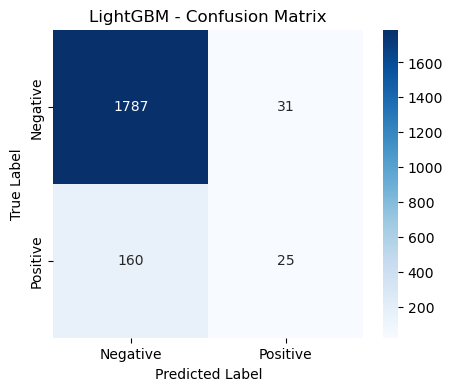


XGBoost Results
ROC-AUC: 0.812 | Accuracy: 0.904
Training Time: 4.8s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.44      0.16      0.24       185

    accuracy                           0.90      2003
   macro avg       0.68      0.57      0.59      2003
weighted avg       0.88      0.90      0.88      2003



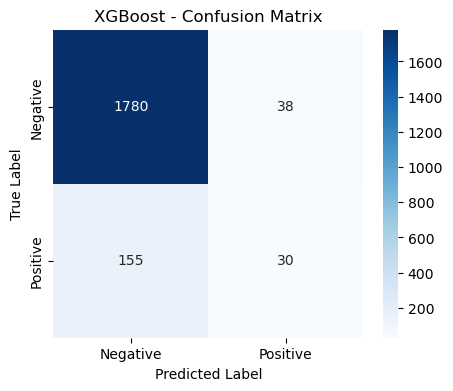


CatBoost Results
ROC-AUC: 0.814 | Accuracy: 0.896
Training Time: 4.5s | Predicting Time: 0.000007s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1818
         1.0       0.37      0.18      0.25       185

    accuracy                           0.90      2003
   macro avg       0.65      0.58      0.60      2003
weighted avg       0.87      0.90      0.88      2003



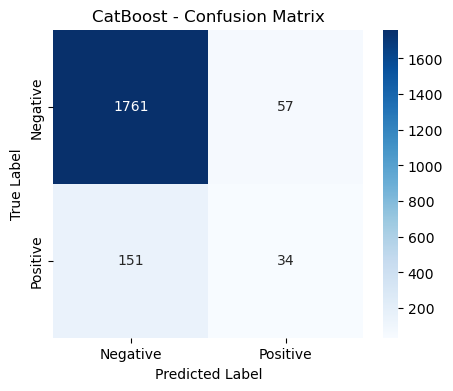


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.824 | Accuracy: 0.906
Precision: 0.877 | Recall: 0.906 | F1-score: 0.883
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.47      0.15      0.22       185

    accuracy                           0.91      2003
   macro avg       0.69      0.56      0.59      2003
weighted avg       0.88      0.91      0.88      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
         LightGBM 0.831026  0.904643   0.874284 0.904643  0.880756    5.229475      0.000025
Weighted Ensemble 0.823875  0.905642   0.876903 0.905642  0.882576         NaN           NaN
         CatBoost 0.813653  0.896156   0.870467 0.896156  0.879781    4.532119      0.000007
          XGBoost 0.811950  0.903645   0.8756

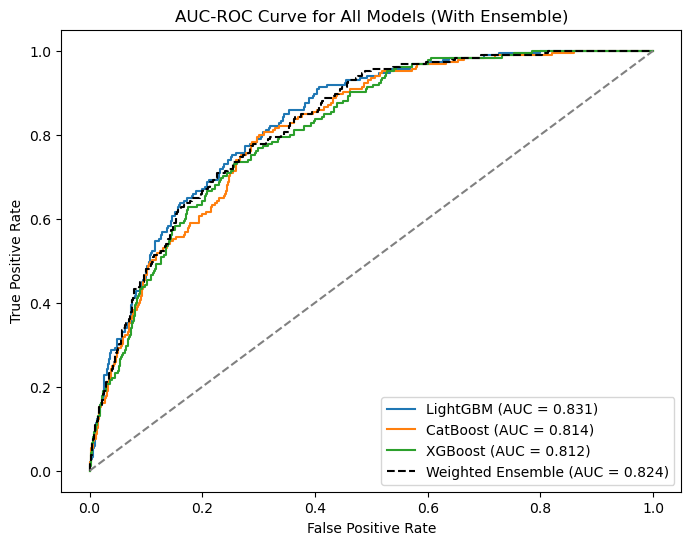

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 0           LightGBM  0.831026  0.904643    5.229475      0.000025   0.874284   
 3  Weighted Ensemble  0.823875  0.905642         NaN           NaN   0.876903   
 2           CatBoost  0.813653  0.896156    4.532119      0.000007   0.870467   
 1            XGBoost  0.811950  0.903645    4.789322      0.000009   0.875681   
 
      recall  f1-score  support  
 0  0.904643  0.880756   2003.0  
 3  0.905642  0.882576      NaN  
 2  0.896156  0.879781   2003.0  
 1  0.903645  0.882867   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [169]:
classify.run_classification2(best_features[0][:150], "DQ_TARGET", all_features)



LightGBM Results
ROC-AUC: 0.812 | Accuracy: 0.903
Training Time: 2.6s | Predicting Time: 0.000021s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.42      0.15      0.22       185

    accuracy                           0.90      2003
   macro avg       0.67      0.56      0.58      2003
weighted avg       0.87      0.90      0.88      2003



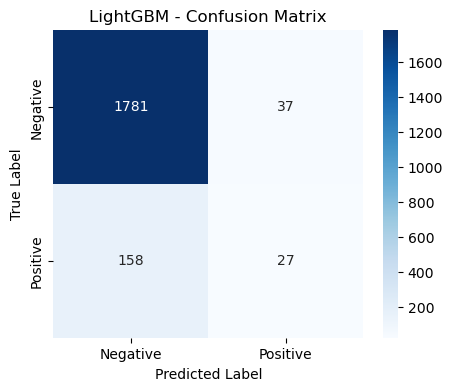


XGBoost Results
ROC-AUC: 0.805 | Accuracy: 0.903
Training Time: 2.8s | Predicting Time: 0.000008s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.43      0.15      0.22       185

    accuracy                           0.90      2003
   macro avg       0.67      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003



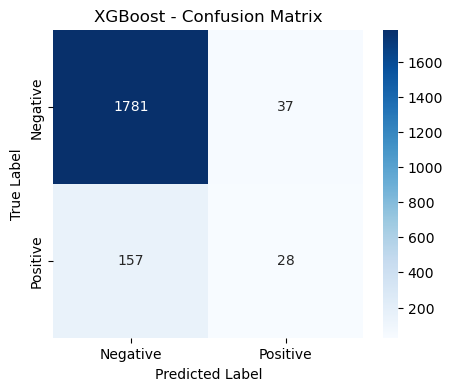


CatBoost Results
ROC-AUC: 0.810 | Accuracy: 0.902
Training Time: 4.1s | Predicting Time: 0.000007s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1818
         1.0       0.44      0.21      0.28       185

    accuracy                           0.90      2003
   macro avg       0.68      0.59      0.61      2003
weighted avg       0.88      0.90      0.89      2003



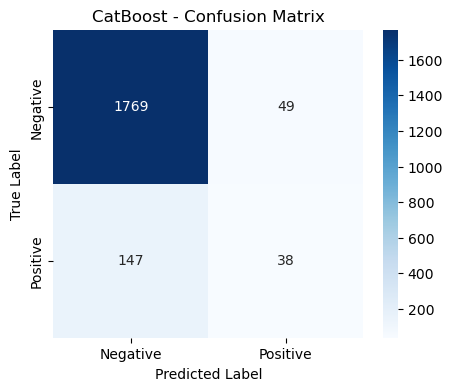


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.815 | Accuracy: 0.901
Precision: 0.872 | Recall: 0.901 | F1-score: 0.881
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.41      0.16      0.23       185

    accuracy                           0.90      2003
   macro avg       0.66      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.814750  0.901148   0.872076 0.901148  0.880641         NaN           NaN
         LightGBM 0.812173  0.902646   0.872644 0.902646  0.880559    2.587741      0.000021
         CatBoost 0.809684  0.902147   0.878344 0.902147  0.885803    4.097097      0.000007
          XGBoost 0.805316  0.903145   0.8738

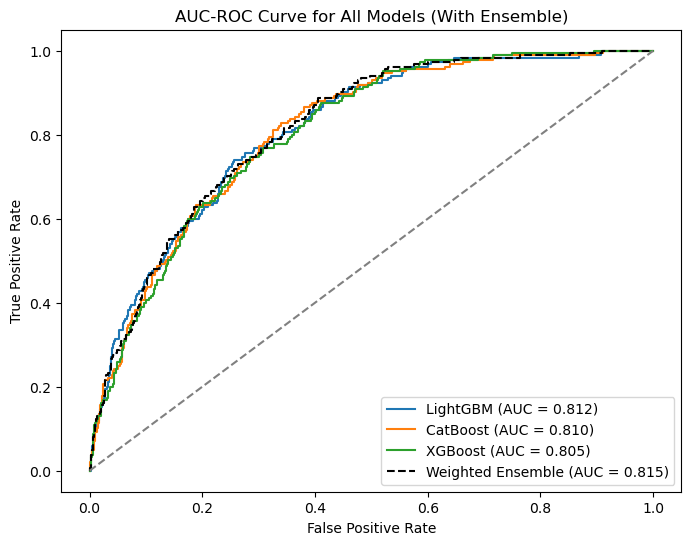

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 3  Weighted Ensemble  0.814750  0.901148         NaN           NaN   0.872076   
 0           LightGBM  0.812173  0.902646    2.587741      0.000021   0.872644   
 2           CatBoost  0.809684  0.902147    4.097097      0.000007   0.878344   
 1            XGBoost  0.805316  0.903145    2.846172      0.000008   0.873896   
 
      recall  f1-score  support  
 3  0.901148  0.880641      NaN  
 0  0.902646  0.880559   2003.0  
 2  0.902147  0.885803   2003.0  
 1  0.903145  0.881447   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [161]:
classify.run_classification2(best_features[2][:150], "DQ_TARGET", all_features)

In [168]:
classify.run_classification_plotly(best_features[0][:150], "DQ_TARGET", all_features)


Logistic Regression Results
ROC-AUC: 0.783 | Accuracy: 0.757
Training Time: 0.3s | Predicting Time: 0.000006s



Random Forest Results
ROC-AUC: 0.802 | Accuracy: 0.902
Training Time: 15.7s | Predicting Time: 0.000033s



LightGBM Results
ROC-AUC: 0.814 | Accuracy: 0.905
Training Time: 2.4s | Predicting Time: 0.000012s



Balanced RF Results
ROC-AUC: 0.807 | Accuracy: 0.901
Training Time: 20.4s | Predicting Time: 0.000033s



XGBoost Results
ROC-AUC: 0.813 | Accuracy: 0.905
Training Time: 2.4s | Predicting Time: 0.000005s



CatBoost Results
ROC-AUC: 0.823 | Accuracy: 0.908
Training Time: 18.6s | Predicting Time: 0.000008s



HistGB Results
ROC-AUC: 0.818 | Accuracy: 0.905
Training Time: 4.0s | Predicting Time: 0.000017s



RUSBoost Results
ROC-AUC: 0.778 | Accuracy: 0.802
Training Time: 13.2s | Predicting Time: 0.000014s


ValueError: 
    Invalid element(s) received for the 'color' property of parcoords.line
        Invalid elements include: ['CatBoost', 'HistGB', 'LightGBM', 'XGBoost', 'Balanced RF', 'Random Forest', 'Logistic Regression', 'RUSBoost']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to parcoords.line.colorscale
      - A list or array of any of the above

In [ ]:
info = classify.individual_test(best_features[0][:150], "LightGBM", all_features)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ATM_CASH_mean
- ATM_CASH_skewness
- AUTOMOTIVE_coef_variation
- AUTOMOTIVE_count
- AUTOMOTIVE_iqr
- ...


In [77]:
target_consumers = consumer[consumer['DQ_TARGET'].isna()]
target_features = features.one_hot_accounts(acct, target_consumers)
target_features = features.get_total_transactions(target_features, transactions)

In [78]:
target_features

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,transactions
0,4000,2021-09-01,773.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,91.0
1,4001,2021-10-01,643.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,268.0
2,4002,2021-12-01,734.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,133.0
3,4003,2021-12-01,661.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,785.0
4,4004,2021-10-01,802.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,14991,2022-01-26,667.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,676.0
2597,14992,2022-03-14,709.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1535.0
2598,14994,2022-01-15,616.0,NaN,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1012.0
2599,14996,2022-01-15,625.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,327.0
